## TV광고 데이터 
- 지난주에는 전체적인 TV광고의 추이를 다루었다면 이번주는 특정 브랜드를 하나 선정하여, 그 브랜드의 TV광고는 어떤 구성을 하고 있는지 분석하기로 함.
추가적으로 경쟁브랜드의 TV광고 상황은 어떤지도 분석하고자 함.
- 선정 브랜드 : 메르세데스 벤츠 
- 선정 이유 : 전체 수입차 마켓 점유율 중 벤츠가 28%로 가장 많고(모델 데이터 참조), 사람들이 외제차하면 벤츠를 무조건 떠올리는 경향이 있어, 왜 그런걸까? 혹시 마케팅, 광고를 잘 하지 않아서 그런 것일까? 라는 의문을 가지게 됨.
- 경쟁브랜드 : BMW
- 선정 이유 : 전체 수입자 마켓 점유율중 벤츠 다음으로 높은 21%를 차지함(모델 데이터 참조). 같은 독일차이며, 대부분 우리나라는 벤츠 아니면 BMW라는 인식이 강함. (나조차도)

In [64]:
import numpy as np   # numpy 패키지 불러오기 
import pandas as pd  # pandas 패키지 불러오기 
import matplotlib  # matplotlib 패키지 불러오기 
import matplotlib.pyplot as plt # 그래프 시각화를 위한 패키지 불러오기
import seaborn as sns  # seaborn 패키지 불러오기 
import warnings        # warings(경고 메시지 없애주는)패키지 불러오기 
from matplotlib import font_manager, rc  # matplotlib안 한글 깨짐 처리
import platform   # 현재 사용하고 있는 시스템 유형을 알려주는 패키지 
import plotly.express as px  # 더 나은 시각화를 위해 plotly 패키지 불러오기 

# 운영체제에 맞게 폰트 설정
if platform.system() == "Windows":
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False  # 그래프에서 마이너스 기호 표시
warnings.filterwarnings(action='ignore') # 경고 매세지 강제로 없애주는 설정 

In [132]:
# pyecharts의 그래프를 보기위해 패키지 설치 (꼭 해당 버전으로 설치해야 그래프가 나옴)
# !pip install pyecharts==0.5.8 

In [97]:
# 구 TV_GRPs_by_models_v2_1.csv 데이터 (브랜드 컬럼이 추가된 tv광고 데이터))
data = pd.read_csv('datas/TV_GRPs.csv')
data.head()

,년,월,Advertiser,Brand,Product,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+
0,2016,01월,BMW코리아,BMW,BMW미니클럽맨,20대,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,2016,01월,BMW코리아,BMW,BMW미니클럽맨,30대,1,21000,0.5,21000,0.5,0.0,0.0,0.0,0.0
2,2016,01월,BMW코리아,BMW,BMW미니클럽맨,40대,1,23840,0.6,23840,0.6,0.0,0.0,0.0,0.0
3,2016,01월,BMW코리아,BMW,BMW미니클럽맨,50대,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2016,01월,BMW코리아,BMW,BMW미니클럽맨,60대,1,5638,0.2,5638,0.2,0.0,0.0,0.0,0.0


In [ ]:
brand = pd.DataFrame(data['Brand'].value_counts()).sort_index()
brand

In [ ]:
from pyecharts import Bar

keys = ['BMW','닛산','랜드로버','렉서스','링컨','마세라티', '벤츠', '볼보', '시트로엥', '아우디', '애스턴마틴',
        '인피니티', '재규어', '지프', '캐딜락', '도요타', '포드', '포르쉐', '폭스바겐', '푸조', '피아트', '혼다']
values = [492, 84, 294, 564, 78, 414, 414, 618, 132, 372, 18, 84, 150, 276, 642, 426, 
               252, 18, 258, 360, 12, 336]


bar = Bar("브랜드별 광고 언급횟수", "기준: 브랜드 카운트")
bar.add('bar', keys, values)

bar

- 언급한 광고 횟수로는 벤츠가 414건, BMW가 492건으로 약 -15% 부족하다. 하지만 점유율은 + 7% 포인트 차이로 벤츠가 더 높다. 우리나라 사람들이 벤츠를 더 좋아해서 일까?

In [98]:
# 잘 못들어간 월 데이터 수정 (101월 -> 11월, 102월 -> 12월)
## '년'과 '월'의 컬럼을 영문명으로 변경 
data["월"] = data["월"].replace({"01월": "1월", "101월": "11월", "102월": "12월"})
data.rename(columns={"년": "Year", "월": "Month"}, inplace=True)

In [99]:
data['Year'] = data['Year'].astype('int')
data['Year'] = data['Year'].astype('str')

data["Month"] = data['Month'].apply(lambda x: x[:-1]).astype('int')

In [100]:
data['Year'] = pd.to_datetime(data['Year'], format="%Y", errors='raise')
data['Month'] = pd.to_datetime(data['Month'], format="%m", errors='raise')

data['Year'] = data['Year'].dt.year
data['Month'] = data["Month"].dt.month

data.sort_values(["Year", "Month"], inplace=True)

data['date'] = data['Year'].astype(str) + "-" + data['Month'].astype(str)

In [101]:
data = data[['date', 'Year', 'Month', 'Advertiser', 'Brand', 'Product', '연령대', '광고횟수', '시청자수', 'GRP',
              '도달자수', '도달율 1+', '도달율 3+', "도달율 5+", "도달율 7+", '도달율 9+']]

In [102]:
data.head()

,date,Year,Month,Advertiser,Brand,Product,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+
0,2016-1,2016,1,BMW코리아,BMW,BMW미니클럽맨,20대,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,2016-1,2016,1,BMW코리아,BMW,BMW미니클럽맨,30대,1,21000,0.5,21000,0.5,0.0,0.0,0.0,0.0
2,2016-1,2016,1,BMW코리아,BMW,BMW미니클럽맨,40대,1,23840,0.6,23840,0.6,0.0,0.0,0.0,0.0
3,2016-1,2016,1,BMW코리아,BMW,BMW미니클럽맨,50대,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2016-1,2016,1,BMW코리아,BMW,BMW미니클럽맨,60대,1,5638,0.2,5638,0.2,0.0,0.0,0.0,0.0


In [103]:
# 평균 시청률 : GRP / 광고횟수
data['평균시청률'] = data['GRP'] / data['광고횟수']

In [104]:
# 광고주 기준으로 count하고, 평균시청률을 구함 
ad_count = data.groupby("Advertiser").size().reset_index(name='count')
ad_count.sort_values('count', ascending=False, inplace=True)

avg_view = data.groupby('Advertiser').agg('mean')[['평균시청률']].reset_index()
avg_view.sort_values('평균시청률', ascending=False, inplace=True)

In [105]:
# 평균노출빈도 (GRP / 도달율을 모두 더한 값)
data['평균노출빈도'] = data['GRP'] / (data['도달율 1+'] + data['도달율 3+'] + data['도달율 5+'] +  
                                data['도달율 7+'] + data['도달율 9+'])
data['평균노출빈도'].fillna(0, inplace=True)
data['평균노출빈도'].replace(np.inf, 0, inplace=True)
data.tail()

,date,Year,Month,Advertiser,Brand,Product,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률,평균노출빈도
2233,2021-4,2021,4,혼다코리아,혼다,혼다CR-V,30대,498,767415,20.8,535073,14.5,1.5,0.2,0.1,0.1,0.041767,1.268293
2234,2021-4,2021,4,혼다코리아,혼다,혼다CR-V,40대,498,1581617,38.4,890827,21.6,4.4,0.2,0.0,0.0,0.077108,1.465649
2235,2021-4,2021,4,혼다코리아,혼다,혼다CR-V,50대,498,3023227,73.9,1370128,33.5,9.9,2.2,0.8,0.4,0.148394,1.579060
2236,2021-4,2021,4,혼다코리아,혼다,혼다CR-V,60대,498,5377999,106.1,2194754,43.3,15.8,5.3,1.9,0.7,0.213052,1.583582
2237,2021-4,2021,4,혼다코리아,혼다,혼다CR-V,개인,498,11827075,49.1,5573971,23.1,6.5,1.7,0.6,0.2,0.098594,1.529595


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6294 entries, 0 to 2237
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        6294 non-null   object 
 1   Year        6294 non-null   int64  
 2   Month       6294 non-null   int64  
 3   Advertiser  6294 non-null   object 
 4   Brand       6294 non-null   object 
 5   Product     6294 non-null   object 
 6   연령대         6294 non-null   object 
 7   광고횟수        6294 non-null   int64  
 8   시청자수        6294 non-null   int64  
 9   GRP         6294 non-null   float64
 10  도달자수        6294 non-null   int64  
 11  도달율 1+      6294 non-null   float64
 12  도달율 3+      6294 non-null   float64
 13  도달율 5+      6294 non-null   float64
 14  도달율 7+      6294 non-null   float64
 15  도달율 9+      6294 non-null   float64
 16  평균시청률       6294 non-null   float64
 17  평균노출빈도      6294 non-null   float64
dtypes: float64(8), int64(5), object(5)
memory usage: 934.3+ KB


In [106]:
# 브랜드 출력 
data['Brand'].unique()

array(['BMW', '마세라티', '메르세데스벤츠', '아우디', '재규어', '링컨', '포드', '인피니티', '토요타',
       '렉서스', '푸조', '혼다', '볼보', '피아트', '랜드로버', '폭스바겐', '캐딜락', '시트로엥',
       '지프', '닛산', '포르쉐', '애스턴마틴'], dtype=object)

In [107]:
# 브랜드 메르세데스벤츠의 정보를 데이터 프레임으로 출력
benz = data['Brand'] == '메르세데스벤츠'
benz = data[benz]
benz

,date,Year,Month,Advertiser,Brand,Product,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률,평균노출빈도
18,2016-1,2016,1,메르세데스벤츠코리아,메르세데스벤츠,메르세데스벤츠,20대,125,85369,2.5,82563,2.4,0.0,0.0,0.0,0.0,0.020000,1.041667
19,2016-1,2016,1,메르세데스벤츠코리아,메르세데스벤츠,메르세데스벤츠,30대,125,149637,3.6,97983,2.4,0.4,0.1,0.1,0.0,0.028800,1.200000
20,2016-1,2016,1,메르세데스벤츠코리아,메르세데스벤츠,메르세데스벤츠,40대,125,156654,3.8,110227,2.7,0.3,0.0,0.0,0.0,0.030400,1.266667
21,2016-1,2016,1,메르세데스벤츠코리아,메르세데스벤츠,메르세데스벤츠,50대,125,302097,9.7,241425,7.8,0.4,0.0,0.0,0.0,0.077600,1.182927
22,2016-1,2016,1,메르세데스벤츠코리아,메르세데스벤츠,메르세데스벤츠,60대,125,614149,19.5,385657,12.3,1.0,0.3,0.3,0.1,0.156000,1.392857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2021-1,2021,1,메르세데스벤츠코리아,메르세데스벤츠,메르세데스벤츠,30대,3,6706,0.2,6706,0.2,0.0,0.0,0.0,0.0,0.066667,1.000000
464,2021-1,2021,1,메르세데스벤츠코리아,메르세데스벤츠,메르세데스벤츠,40대,3,6452,0.2,6452,0.2,0.0,0.0,0.0,0.0,0.066667,1.000000
465,2021-1,2021,1,메르세데스벤츠코리아,메르세데스벤츠,메르세데스벤츠,50대,3,21382,0.5,21382,0.5,0.0,0.0,0.0,0.0,0.166667,1.000000
466,2021-1,2021,1,메르세데스벤츠코리아,메르세데스벤츠,메르세데스벤츠,60대,3,17328,0.3,17328,0.3,0.0,0.0,0.0,0.0,0.100000,1.000000


In [108]:
# value_coount를 사용해서 년도별 광고 언급 횟수 출력 
year = pd.DataFrame(benz['Year'].value_counts()).sort_index()
year

,Year
2016,54
2017,132
2018,72
2019,78
2020,72
2021,6


In [109]:
import pyecharts

key = list(year["Year"][:].keys())
value = list(year["Year"][:].values)

bar = pyecharts.Bar("연도별 Benz 광고 언급수", "2016년 ~ 2021년")
bar.add("광고언급수", key, value, mark_line=["average"], mark_point=["max", "min"])

bar.height = 500
bar.width = 800
bar

- 년도 별로 수량으로만 보았을 때 가장 광고를 많이 했던 것은  2017년 이다.

In [110]:
# 해당 년도의 월별 데이터를 보기위해 date기준으로 정렬 (0000-01-01 형식으로 변환됨.)
date = pd.to_datetime(benz['date'], format='%Y-%m')
date

18    2016-01-01
19    2016-01-01
20    2016-01-01
21    2016-01-01
22    2016-01-01
         ...    
463   2021-01-01
464   2021-01-01
465   2021-01-01
466   2021-01-01
467   2021-01-01
Name: date, Length: 414, dtype: datetime64[ns]

In [111]:
date = pd.DataFrame(date.value_counts()).sort_index()
date

,date
2016-01-01,6
2016-02-01,6
2016-04-01,6
2016-05-01,6
2016-07-01,6
2016-08-01,6
2016-09-01,6
2016-10-01,6
2016-12-01,6
2017-05-01,6


In [112]:
import pyecharts

key = list(date['date'].keys())
value = list(date["date"].values)

bar = pyecharts.Bar("연, 월별 벤츠 광고언급", "2016년 ~ 2021년")
bar.add("광고언급수", key, value, mark_line=["average"], mark_point=["max", "min"])

bar.height = 500
bar.width = 800
bar

- 년, 월 별로 살펴 보니 가장 많았던 2017년도에는 9월과 10월에 광고언급이 많았다. 

In [113]:
pd.DataFrame(benz[['date', '광고횟수']])

,date,광고횟수
18,2016-1,125
19,2016-1,125
20,2016-1,125
21,2016-1,125
22,2016-1,125
...,...,...
463,2021-1,3
464,2021-1,3
465,2021-1,3
466,2021-1,3


In [114]:
adv_sum = benz.groupby(by=['Year'], as_index=True).sum()
adv_sum

,Month,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률,평균노출빈도
Year,,,,,,,,,,,,
2016,348,17436,179677103,2860.0,55078294,858.5,349.3,183.3,107.5,61.0,11.310253,89.183414
2017,1176,17928,563737653,7992.3,203095023,2853.8,970.8,444.0,236.3,137.7,84.780702,217.757115
2018,324,9726,445262494,6205.8,149626588,2078.9,829.6,386.7,192.8,101.6,52.724435,95.085937
2019,438,15192,540454373,7504.3,157702032,2184.8,921.4,480.1,275.6,170.8,59.678928,121.994471
2020,576,15462,582561033,8005.0,152352056,2089.5,953.0,539.4,335.6,225.8,147.799775,126.448870
2021,6,18,134341,1.9,134341,1.9,0.0,0.0,0.0,0.0,0.633333,6.000000


In [115]:
key = ['2016', '2017', '2018', '2019', '2020', '2021']
value = [17436, 17928, 9726, 15192, 15462, 18 ]

bar = pyecharts.Bar("연 벤츠 광고횟수 합산", "2016년 ~ 2021년")
bar.add("광고횟수합산", key, value, mark_line=["average"], mark_point=["max", "min"])

bar.height = 500
bar.width = 800
bar

- 광고횟수를 모두 합산한 결과 2017년이 많지만 2016년도와 차이가 많이 없다. 
- 2016년도에 광고언급을 많이 하지 않았지만 광고횟수가 상대적으로 많았음을 보여준다.

In [116]:
adv_sum1 = benz.groupby(by=['date'], as_index=True).sum()
adv_sum1

,Year,Month,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률,평균노출빈도
date,,,,,,,,,,,,,
2016-1,12096,6,750,2682474,45.2,1893950,31.9,2.4,0.5,0.5,0.1,0.361600,7.354951
2016-10,12096,60,192,2127078,36.5,757691,12.7,4.9,2.9,1.5,0.1,1.140625,9.041587
2016-12,12096,72,564,30261920,479.3,10779831,167.9,54.4,28.9,17.3,9.2,5.098936,10.185882
2016-2,12096,12,870,2759540,46.6,1732130,29.2,3.7,0.6,0.3,0.1,0.321379,7.930048
2016-4,12096,24,3228,24869956,412.1,6865872,108.5,46.3,25.3,17.3,10.6,0.765985,11.377381
2016-5,12096,30,696,2311652,38.5,1213212,20.2,3.9,1.2,0.6,0.3,0.331897,8.579963
2016-7,12096,42,6576,78497188,1229.8,22410089,340.9,175.8,89.6,47.9,26.1,1.122080,10.773364
2016-8,12096,48,3324,12607119,199.7,6010262,93.3,21.7,9.4,3.9,1.6,0.360469,8.949001
2016-9,12096,54,1236,23560176,372.3,3415257,53.9,36.2,24.9,18.2,12.9,1.807282,14.991236


In [117]:
pd.DataFrame(adv_sum1[['광고횟수']])

,광고횟수
date,
2016-1,750
2016-10,192
2016-12,564
2016-2,870
2016-4,3228
2016-5,696
2016-7,6576
2016-8,3324
2016-9,1236


In [118]:
key = ['2016-1','2016-2', '2016-4', '2016-5', '2016-7', '2016-8', '2016-9', '2016-10', '2016-12',
      '2017-5', '2017-6', '2017-7', '2017-8', '2017-9', '2017-10', '2017-11', '2017-12', '2018-1',
      '2018-2', '2018-4', '2018-5', '2018-6', '2018-8', '2018-9', '2018-10', '2019-1', '2019-2',
      '2019-3', '2019-4', '2019-6', '2019-7', '2019-8', '2019-9', '2019-11', '2019-12', '2020-2',
      '2020-3', '2020-4', '2020-5', '2020-9', '2020-10', '2020-11', '2020-12', '2021-1']
value = [750, 870, 3228, 696, 6576, 3324, 1236, 192, 564, 726, 684, 1326, 4524, 3036, 6072, 42, 1518,
        984, 1098, 912, 1608, 6, 1884, 1896, 1338, 972, 1650, 3942, 372, 540, 2424, 1974, 6, 1242, 2070,
        72, 120, 96, 612, 4200, 4722, 1398, 4242, 18]

bar = pyecharts.Bar("연, 월별 광고수 합산", "2016년 ~ 2021년")
bar.add("광고수합산", key, value, mark_line=["average"], mark_point=["max", "min"])

bar.height = 500
bar.width = 800
bar

- 연월 별 광고횟수 합산 결과를 보니 2016년 7월이 광고횟수가 가장 많음을 알 수 있다.

- 광고주는 메르세데스벤츠 코리아가 88.41%로 많음
- 참고로 메르세데스벤츠 코리아와 더클래스효성의 차이는 메르세데스벤츠 코리아는 실제 판매 및 고객지원 영업을 하지 않고, 마케팅, 딜러들과 본사와의 중간 컨트롤을 맡고 있고, 더클래스효성은 딜러(즉 자동차 판매)업체를 말한다. (벤츠의 딜러 업체는 더 클래스효성, 한성자동차, 케이이씨오토 등이 있음)

In [121]:
adv_sum2 = benz.groupby(by=['Advertiser'], as_index=True).sum()
adv_sum2

,Year,Month,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률,평균노출빈도
Advertiser,,,,,,,,,,,,,
더클래스효성,96804,462,4494,80854464,1209.3,14996504,223.4,123.7,83.1,55.6,40.1,15.168453,94.941400
메르세데스벤츠코리아,738648,2406,71268,2230972533,31360.0,702991830,9844.0,3900.4,1950.4,1092.2,656.8,341.758974,561.528407


In [122]:
# 광고 횟수의 합을 기준으로 그래프를 그림.
keys = ['메르세데스벤츠코리아', '더클래스효성']
values = [71268, 4494]

pie = Pie("광고회사별 광고횟수합 ", "기준: 광고횟수의 총합")
pie.add("", keys, values, center=[50,50], is_randome=True, radius=[50, 90], rosetype='radius', is_legend_show=False,
       is_label_show=True)

pie

- 광고주별 광고횟수 합산으로 봐도 메르세데스벤츠코리아가 압도적으로 많다.

In [123]:
benz_age = benz.groupby(['Advertiser', '연령대']).agg('mean').round(2)[['GRP', '평균시청률', '평균노출빈도']].reset_index()
benz_age

,Advertiser,연령대,GRP,평균시청률,평균노출빈도
0,더클래스효성,20대,10.36,0.11,1.71
1,더클래스효성,30대,13.71,0.23,1.91
2,더클래스효성,40대,29.94,0.35,2.05
3,더클래스효성,50대,38.95,0.48,2.03
4,더클래스효성,60대,35.90,0.45,2.13
5,더클래스효성,개인,22.30,0.28,2.04
6,메르세데스벤츠코리아,20대,33.67,0.39,1.34
7,메르세데스벤츠코리아,30대,60.26,0.65,1.42
8,메르세데스벤츠코리아,40대,110.89,1.29,1.54
9,메르세데스벤츠코리아,50대,122.11,1.39,1.65


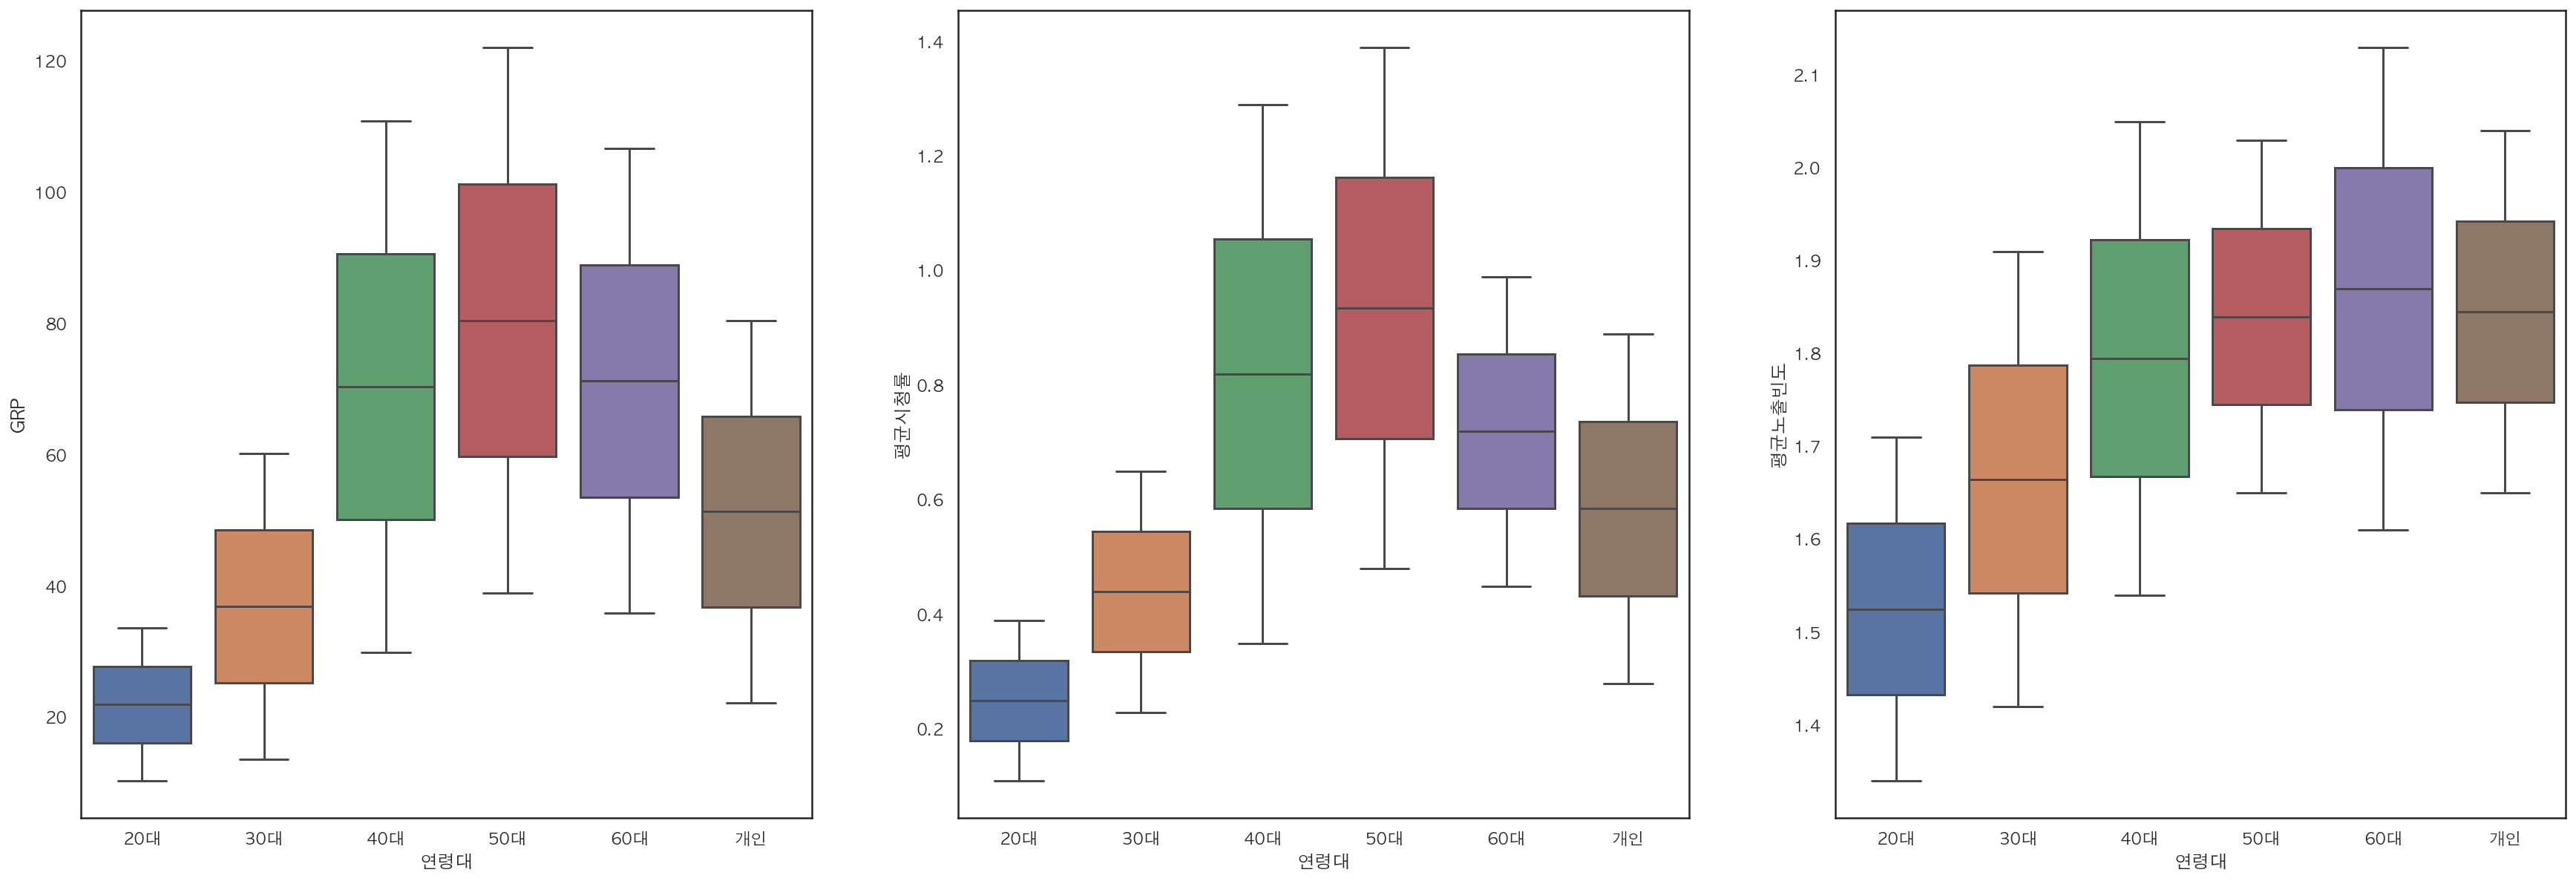

In [124]:
plt.figure(figsize=(30,10))

plt.subplot(131)
sns.boxplot(data=benz_age, x='연령대', y='GRP')

plt.subplot(132)
sns.boxplot(data=benz_age, x="연령대", y='평균시청률')

plt.subplot(133)
sns.boxplot(data=benz_age, x="연령대", y='평균노출빈도')

plt.show()

- 벤츠 브랜드만 놓고본 결과 GRP, 평균시청률은 50대 -> 40대 -> 60대 순으로 많았다.하지만 평균노출 빈도를 보았을 때 60대 -> 40대 -> 50대 순으로 많았다. 
- 20대와 30대는 40, 50, 60 대에 비해 TV를 덜 보는 세대 임을 짐작할 수 있다. 광고, 마케팅을 할 때 SNS, Youtube 등 플랫폼을 통한 마케팅도 필요해 보인다.

In [125]:
# 워드클라우드 사용 예정 

#### 경쟁 브랜드 BMW를 살펴보자 

In [126]:
# 브랜드 BMW의 정보를 데이터 프레임으로 출력
bmw = data['Brand'] == 'BMW'
bmw = data[bmw]
bmw

,date,Year,Month,Advertiser,Brand,Product,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률,평균노출빈도
0,2016-1,2016,1,BMW코리아,BMW,BMW미니클럽맨,20대,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2016-1,2016,1,BMW코리아,BMW,BMW미니클럽맨,30대,1,21000,0.5,21000,0.5,0.0,0.0,0.0,0.0,0.500000,1.000000
2,2016-1,2016,1,BMW코리아,BMW,BMW미니클럽맨,40대,1,23840,0.6,23840,0.6,0.0,0.0,0.0,0.0,0.600000,1.000000
3,2016-1,2016,1,BMW코리아,BMW,BMW미니클럽맨,50대,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,2016-1,2016,1,BMW코리아,BMW,BMW미니클럽맨,60대,1,5638,0.2,5638,0.2,0.0,0.0,0.0,0.0,0.200000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,2020-12,2020,12,BMW코리아,BMW,BMW코리아5시리즈,30대,118,270932,7.2,228182,6.1,0.0,0.0,0.0,0.0,0.061017,1.180328
5648,2020-12,2020,12,BMW코리아,BMW,BMW코리아5시리즈,40대,118,763494,18.3,601041,14.4,0.5,0.0,0.0,0.0,0.155085,1.228188
5649,2020-12,2020,12,BMW코리아,BMW,BMW코리아5시리즈,50대,118,523809,13.0,441221,10.9,0.2,0.0,0.0,0.0,0.110169,1.171171
5650,2020-12,2020,12,BMW코리아,BMW,BMW코리아5시리즈,60대,118,317311,6.6,254738,5.3,0.4,0.0,0.0,0.0,0.055932,1.157895


In [127]:
# value_coount를 사용해서 년도별 광고 언급 횟수 출력 
bmw_year = pd.DataFrame(bmw['Year'].value_counts()).sort_index()
bmw_year

,Year
2016,132
2017,114
2018,84
2019,90
2020,72


In [128]:
key = list(bmw_year["Year"][:].keys())
value = list(bmw_year["Year"][:].values)

bar = pyecharts.Bar("연도별 BMW 광고 언급수", "2016년 ~ 2021년")
bar.add("광고언급수", key, value, mark_line=["average"], mark_point=["max", "min"])

bar.height = 500
bar.width = 800
bar

In [129]:
bmw_sum1 = bmw.groupby(by=['Year'], as_index=True).sum()
bmw_sum1

,Month,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률,평균노출빈도
Year,,,,,,,,,,,,
2016,870,64446,774726605,12358.9,219936809,3411.9,1393.6,702.1,425.6,283.6,169.994515,209.569333
2017,768,77838,1098837049,15672.4,279343814,3950.7,1845.0,1049.5,650.8,421.8,27.924396,186.284592
2018,582,56406,735444326,10338.6,198300799,2763.5,1255.8,705.7,416.8,264.6,41.712759,134.161240
2019,510,40212,452396503,6308.0,132309314,1842.9,736.6,403.4,238.3,146.7,34.272237,130.053648
2020,468,49026,581673293,7979.6,154945864,2117.2,967.0,550.5,341.8,215.1,19.636500,98.817414


In [130]:
key = ['2016', '2017', '2018', '2019', '2020', '2021']
value = [64446, 77838, 56406, 40212, 468, 0]

bar = pyecharts.Bar("연 BMW 광고횟수 합산", "2016년 ~ 2021년")
bar.add("광고횟수합산", key, value, mark_line=["average"], mark_point=["max", "min"])

bar.height = 500
bar.width = 800
bar

In [133]:
adv_sum2 = bmw.groupby(by=['date'], as_index=True).sum()
adv_sum2

,Year,Month,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률,평균노출빈도
date,,,,,,,,,,,,,
2016-1,24192,12,2190,56302370,902.5,18046176,276.8,109.2,58.3,34.2,21.6,4.075000,14.482698
2016-10,24192,120,3978,50677315,789.7,23229070,357.6,97.0,34.7,12.7,6.2,2.403822,17.911778
2016-11,12096,66,2154,16030189,244.5,8082416,122.5,27.5,6.5,2.7,1.2,0.681058,9.099442
2016-12,36288,216,474,30296205,462.9,11654054,177.3,64.9,20.0,10.4,7.1,22.432778,22.730013
2016-3,36288,54,7590,121446022,1943.5,37607406,587.3,259.4,125.1,74.0,48.0,61.388604,31.358911
2016-4,36288,72,7368,67927992,1104.3,20400141,321.5,122.6,49.7,30.0,19.8,71.314241,24.789292
2016-5,24192,60,11970,143652203,2321.8,32534159,508.8,225.1,126.6,83.2,61.8,2.552149,26.773703
2016-6,24192,72,14442,174906551,2811.7,36573740,569.3,280.4,167.6,110.5,74.2,2.343332,27.446550
2016-7,12096,42,4176,3578085,60.7,1412781,23.5,6.5,3.8,2.1,1.3,0.087213,9.310294


In [139]:
pd.DataFrame(adv_sum2[['광고횟수']])

,광고횟수
date,
2016-1,2190
2016-10,3978
2016-11,2154
2016-12,474
2016-3,7590
2016-4,7368
2016-5,11970
2016-6,14442
2016-7,4176


In [140]:
key = ['2016-1', '2016-3', '2016-4', '2016-5', '2016-6', '2016-7', '2016-8', '2016-9', '2016-10', '2016-11',
       '2016-12', '2017-1', '2017-2', '2017-3', '2017-4', '2017-5', '2017-6', '2017-7', '2017-8', '2017-9',
       '2017-10', '2017-11', '2017-12', '2018-1', '2018-2', '2018-5', '2018-6', '2018-7', '2018-8', '2018-9',
       '2018-10', '2018-11', '2018-12', '2019-2', '2019-3', '2019-4', '2019-5', '2019-6', '2019-7', '2019-8',
       '2019-10', '2020-1', '2020-2', '2020-4', '2020-5','2020-9', '2020-10', '2020-11', '2020-12']
value = [2190, 7590, 7368, 11970, 14442, 4176, 6, 10098, 3978, 2154, 474, 426, 288, 10164, 12348, 2904,
        14766, 21726, 1602, 474, 4482, 6792, 1866, 1356, 516, 2034, 12954, 21168, 336, 8412, 9168, 6, 6,
        18, 528, 9462, 16920, 7104, 4044, 1698, 438, 3864, 2304, 4278, 12444, 84, 22764, 2580, 708]

bar = pyecharts.Bar("연, 월별 광고수 합산", "2016년 ~ 2021년")
bar.add("광고수합산", key, value, mark_line=["average"], mark_point=["max", "min"])

bar.height = 500
bar.width = 800
bar

- BMW의 광고횟수 합계를 보면 가장 횟수가 많았던 달은 2020년 10월임을 알 수 있다. 벤츠와 달리 그래프가 일정하지 않고 들쑥날쑥 인데, 벤츠를 의식하고 광고를 하지 않았을까? 하는 의문이 든다. 

In [141]:
bmw_age = bmw.groupby(['Advertiser', '연령대']).agg('mean').round(2)[['GRP', '평균시청률', '평균노출빈도']].reset_index()
bmw_age

,Advertiser,연령대,GRP,평균시청률,평균노출빈도
0,BMW코리아,20대,44.58,0.25,1.39
1,BMW코리아,30대,85.02,0.37,1.45
2,BMW코리아,40대,146.48,0.68,1.57
3,BMW코리아,50대,151.61,0.84,1.64
4,BMW코리아,60대,122.04,0.76,1.59
5,BMW코리아,개인,99.33,0.51,1.59
6,도이치모터스,20대,5.40,1.08,2.08
7,도이치모터스,30대,15.50,3.10,1.82
8,도이치모터스,40대,23.00,4.60,1.90
9,도이치모터스,50대,15.90,3.18,1.83


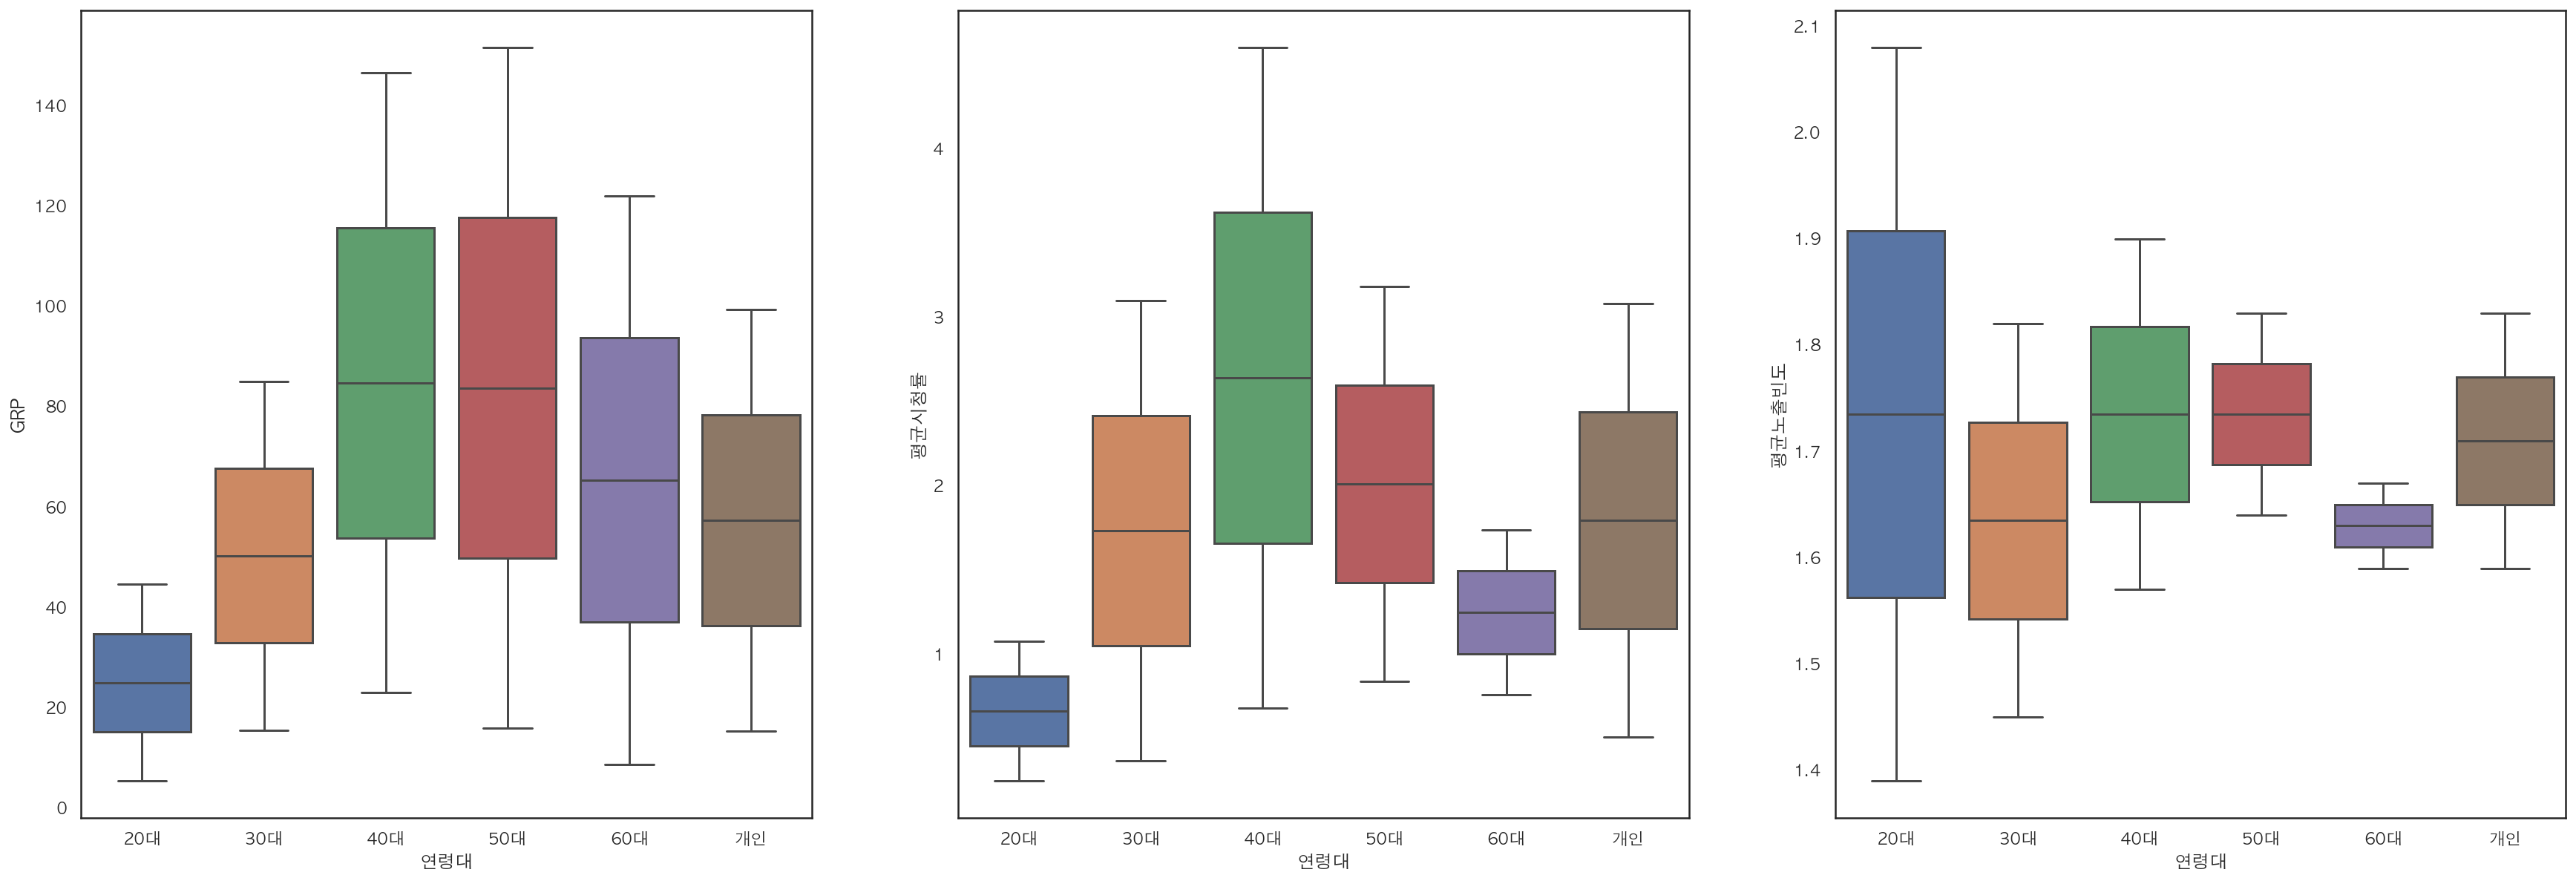

In [142]:
plt.figure(figsize=(30,10))

plt.subplot(131)
sns.boxplot(data=bmw_age, x='연령대', y='GRP')

plt.subplot(132)
sns.boxplot(data=bmw_age, x="연령대", y='평균시청률')

plt.subplot(133)
sns.boxplot(data=bmw_age, x="연령대", y='평균노출빈도')

plt.show()

- BMW는 조금 다른 양상을 보여준다. GRP 기준 50대 -> 40대 -> 60대 순으로 많고, 평균시청률 기준 40대 -> 30대 -> 50대, 평균노출빈도는 20대 -> 40대 -> 30대 순으로 많았다. 
- 확실히 광고를 시청하는 연령대가 벤츠는 어느정도 연령이 높고, BMW는 연령이 낮음을 알수 있다.

In [131]:
key = ['2016', '2017', '2018', '2019', '2020', '2021']
value1 = [17436, 17928, 9726, 15192, 15462, 18 ]
value2 = [64446, 77838, 56406, 40212, 468, 0]

bar = pyecharts.Bar("연 BMW 광고횟수 합산", "2016년 ~ 2021년")
bar.add("Benz 광고횟수합산", key, value1, mark_line=["average"], mark_point=["max", "min"])
bar.add("BMW 광고횟수합산", key, value2, mark_line=["average"], mark_point=["max", "min"])

bar.height = 500
bar.width = 800
bar

- 광고횟수 합산을 보았을 때 BMW가 벤츠보다 광고를 많이 한 것으로 나타났다. 똑같이 2017년도에 광고가 많은 것을 보아 이 때 벤츠와 BMW의 경쟁이 치열했음을 짐작할 수 있다.
- 하지만 2018년도 광고의 횟수가 급격히 줄어든다, 이유가 무엇인고 하니 2017년 BMW와 벤츠 모두 배출가스 조작 논란이 있어, 관련된 광고들을 모두 철회했음을 짐작할 수있다. 

- 벤츠 2017년 배출가스 조작관련 정보 - https://www.khaiyang.com/3404
- 그럼에도 불구하고 당시 벤츠 BMW는 배출가스 논란에도 판매가 좋았다. 참 씁쓸하다 - http://www.sisajournal-e.com/news/articleView.html?idxno=177625